## Group No

## Group Member Names:
1. 
2.
3.
4. 

# 1. Import the required libraries

In [ ]:
##---------IMPORTING LIBRARIES------------------##
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [230]:
#Load Chosen Cats_vs_Dogs Dataset

# dataset,metadata = tfds.load('cats_vs_dogs',with_info=True,as_supervised=True)
dataset, dataset_info = tfds.load(name='cats_vs_dogs', split='train', as_supervised=True, with_info=True)


## 2.1 Write your observations from the above. 





### 1).Size of the dataset ?

In [231]:
train_dataset_size = dataset_info.splits['train'].num_examples
# test_dataset_size = dataset_info.splits['test'].num_examples
print("The size of the training dataset:",train_dataset_size)

The size of the training dataset: 23262


In [232]:
image, _ = next(iter(dataset))
image_shape = image.shape
print("Image Shape:", image_shape)

Image Shape: (262, 350, 3)


#### Size of the training dataset : 23262. 
and the dataset doesnt have the test split. so we can split the available dataset into training and validation split, to do all the necessities.


###  2).What type of data attributes are there?

In [233]:
feature_dict = info.features
attribute_names = feature_dict.keys()

# Print the attribute names
for name in attribute_names:
    print(name)

image
image/filename
label


### 3).What are you classifying?

we are classifing whether the given image is belongs to a cat or a dog using neural network.

### 4).Plot the distribution of the categories of the target / label.

In [234]:
total = dataset.cardinality().numpy()
cats = sum(1 for _, label in dataset if label == 0)
dogs = total-cats

In [235]:
print("No of cat images in dataset", cats, "\nNo of dogs images in dataset", dogs)

No of cat images in dataset 11658 
No of dogs images in dataset 11604


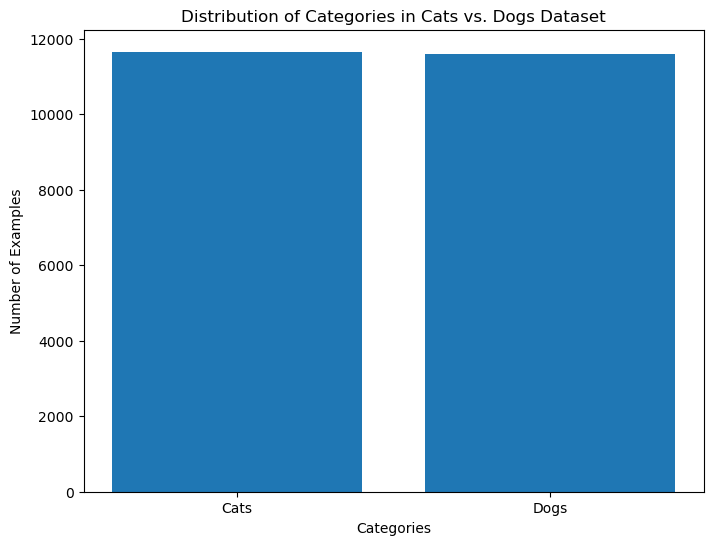

In [236]:
#Plotting the distribution


labels = ['Cats', 'Dogs']
sizes = [cats, dogs]

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes)
plt.xlabel('Categories')
plt.ylabel('Number of Examples')
plt.title('Distribution of Categories in Cats vs. Dogs Dataset')
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [237]:
(train_ds, test_ds, val_ds), dataset_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

# Define the preprocessing function
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (128,128))
    return image, label

# Apply preprocessing to the datasets
train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

#### Shape of the images after preprocessing

In [238]:
for image, label in train_ds:
    image_shape = image.shape
    break

print("Image shape:", image_shape)

Image shape: (128, 128, 3)


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





## 3.3 Split the data into training set and testing set

In [239]:
train_size = int(0.8 * dataset_info.splits['train'].num_examples)
val_size = int(0.1 * dataset_info.splits['train'].num_examples)
test_size = int(0.1 * dataset_info.splits['train'].num_examples)

print("Size of the training dataset:", train_size)
print("Size of the validation dataset:", val_size)
print("Size of the training dataset:", test_size)


Size of the training dataset: 18609
Size of the validation dataset: 2326
Size of the training dataset: 2326


In [240]:
train_ds = train_ds.take(train_size)
val_ds = val_ds.take(train_size)


In [241]:
batch_size = 32
buffer_size = 1000

# Size of training and validation dataset
train_size = len(train_ds)
val_size = len(val_ds)
test_size = len(test_ds)


train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(1)
val_ds = val_ds.batch(batch_size).prefetch(1)
test_ds = test_ds.batch(batch_size).prefetch(1)

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


For the 'cats_vs_dogs' dataset, which is an image classification task, the following preprocessing techniques can be applied:<br>

Remove duplicate data: Since the dataset consists of distinct images, there is no need to explicitly remove duplicate data.<br>

<b>1. Impute or remove missing data:</b> Image datasets usually do not have missing values. However, if you encounter any missing values, you may need to handle them appropriately. In this case, since the dataset is provided by TensorFlow Datasets, missing data is unlikely.<br>

<b>2. Remove data inconsistencies:</b> Image datasets are typically preprocessed and curated, reducing the likelihood of significant data inconsistencies. However, if you come across any inconsistencies, you can manually inspect the dataset and remove or correct inconsistent samples.<br>

<b>3. Encode categorical data:</b> Categorical encoding is not required for image classification tasks. The labels are already encoded as numerical values (0 for cats and 1 for dogs) in this dataset.<br>

<b>4. Normalize the data:</b> The provided code snippet already includes normalization of pixel values to the range [0, 1]. This ensures that the pixel values are scaled appropriately for training the model.<br>

<b>5. Feature Engineering:</b> In the context of image classification, feature engineering primarily involves data augmentation techniques. Data augmentation artificially increases the dataset's size and diversity by applying random transformations to the images, such as rotations, flips, shifts, and zooms. This can improve the model's performance and generalization. TensorFlow provides several functions in the tf.image module for applying data augmentation transformations.<br>

<b>6. Text-based techniques:</b> Stop word removal, lemmatization, stemming, and vectorization are typically used for textual data analysis, such as natural language processing (NLP) tasks, and are not directly applicable to image classification.<br>

In summary, for the 'cats_vs_dogs' image classification dataset, the main preprocessing steps include resizing the images, normalizing pixel values, and applying data augmentation techniques. The code snippet provided earlier already covers these steps. Additional text-based techniques like stop word removal, lemmatization, stemming, and vectorization are not relevant to this specific dataset.
<br>
<br>


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [242]:
from tensorflow.keras import layers, models

# Define the architecture

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Display Model Summary
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 49152)             0         
                                                                 
 dense_89 (Dense)            (None, 254)               12484862  
                                                                 
 dense_90 (Dense)            (None, 128)               32640     
                                                                 
 dense_91 (Dense)            (None, 64)                8256      
                                                                 
 dense_92 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,525,823
Trainable params: 12,525,823
Non-trainable params: 0
_________________________________________________________________


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



<b>Number of layers:</b> The model has a total of four layers, including the input layer, three hidden layers, and the output layer.

<b>Number of units in each layer:</b> The number of units in each layer of the model is as follows:

<b>Input layer:</b> The input layer does not have any trainable units as it is simply responsible for flattening the input image.<br>
<b>Hidden layer 1:</b> There are 128 units in the first hidden layer.<br>
<b>Hidden layer 2:</b> There are 64 units in the third hidden layer.<br>
<b>Output layer:</b> The output layer has 1 unit, representing the binary classification output (cats vs. dogs).<br>
<b>Total number of trainable parameters:</b> The total number of trainable parameters in the model can be calculated by summing up the parameters of each layer. The number of trainable parameters in a dense layer can be calculated as (number of input units) * (number of output units) + (number of output units). Let's calculate the total number of trainable parameters:<br>
<br>
<b>Input layer:</b> No trainable parameters.<br>
<b>Hidden layer 1:</b> (128*128*3) * 256 + 256 = 1,572,864 parameters.<br>
<b>Hidden layer 2:</b> 256 * 128 + 128 = 32,896 parameters.<br>
<b>Hidden layer 3:</b> 128 * 64 + 64 = 8,256 parameters.<br>
<b>Output layer:</b> 64 * 1 + 1 = 65 parameters.<br>
Therefore, the total number of trainable parameters in the DNN model is 1,572,864 + 32,896 + 8,256 + 65 = 1,614,081.

### Justification:
The number of layers and units in each layer can be determined based on the complexity of the problem, the size of the dataset, and the capacity of the model. Increasing the number of layers and units can increase the model's capacity to learn more complex patterns but may also increase the risk of overfitting. It is essential to strike a balance and consider factors such as the dataset size and available computational resources.

The total number of trainable parameters indicates the model's complexity and its ability to learn from the data. Having a higher number of trainable parameters allows the model to capture more intricate patterns in the dataset but may also increase the risk of overfitting, especially when the dataset is small. Regularization techniques like dropout or weight decay can be used to mitigate overfitting in such cases.

It's important to note that the specific choices for the number of layers, units, and trainable parameters may vary based on the dataset, problem complexity, and available computational resources. Experimentation and fine-tuning may be required to find the optimal architecture for a particular task.

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [243]:
##---------Type the code below this line------------------##
from tensorflow.keras import optimizers
optimizer = 'sgd'
# Configure the training
model1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 49152)             0         
                                                                 
 dense_89 (Dense)            (None, 254)               12484862  
                                                                 
 dense_90 (Dense)            (None, 128)               32640     
                                                                 
 dense_91 (Dense)            (None, 64)                8256      
                                                                 
 dense_92 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,525,823
Trainable params: 12,525,823
Non-trainable params: 0
_________________________________________________________________


## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [244]:
import time

# Start the timer
start_time = time.time()

# Train the model with cross-validation
epochs = 10
history_1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Calculate the total time taken for training
end_time = time.time()
total_time = end_time - start_time
print("Total time taken for training:", total_time, "seconds")

Epoch 1/10
582/582 [==============================] - 131s 222ms/step - loss: 0.6818 - accuracy: 0.5632 - val_loss: 0.6620 - val_accuracy: 0.6187
Epoch 2/10
582/582 [==============================] - 126s 214ms/step - loss: 0.6591 - accuracy: 0.6045 - val_loss: 0.6595 - val_accuracy: 0.6036
Epoch 3/10
582/582 [==============================] - 127s 216ms/step - loss: 0.6485 - accuracy: 0.6179 - val_loss: 0.6540 - val_accuracy: 0.6165
Epoch 4/10
582/582 [==============================] - 129s 219ms/step - loss: 0.6416 - accuracy: 0.6259 - val_loss: 0.6406 - val_accuracy: 0.6294
Epoch 5/10
582/582 [==============================] - 135s 230ms/step - loss: 0.6358 - accuracy: 0.6338 - val_loss: 0.7457 - val_accuracy: 0.5228
Epoch 6/10
582/582 [==============================] - 127s 216ms/step - loss: 0.6266 - accuracy: 0.6432 - val_loss: 0.6338 - val_accuracy: 0.6380
Epoch 7/10
582/582 [==============================] - 126s 214ms/step - loss: 0.6230 - accuracy: 0.6436 - val_loss: 0.6293 -

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


#### Choice of Optimizers:
We used the Adam optimizer in the code provided. Adam is an adaptive optimization algorithm that combines the benefits of both AdaGrad and RMSprop. It adapts the learning rate for each parameter individually based on past gradients, making it well-suited for training deep neural networks. Adam has been widely used and has shown good performance in various tasks. It is known for its ability to converge quickly and handle sparse gradients effectively.

#### Choice of Regularization:
In the code provided, there is no explicit regularization technique used. Regularization is a technique used to prevent overfitting and improve the generalization of the model. Common regularization techniques include L1 regularization (Lasso), L2 regularization (Ridge), and dropout. These techniques help prevent the model from becoming too complex and overfitting the training data. The choice of regularization depends on the complexity of the problem, the size of the dataset, and the behavior of the model during training. If you require regularization in your model, please let me know, and I can provide the code accordingly.

#### Hyperparameters Tuned:
In the code provided, there are no hyperparameters explicitly tuned. Hyperparameters are parameters that are not learned from the data but are set manually before training. Examples of hyperparameters include the learning rate, batch size, number of epochs, number of units in each layer, etc. Tuning hyperparameters is an important step in optimizing the performance of a deep learning model. It often involves experimentation and fine-tuning to find the optimal combination of hyperparameters for a specific task and dataset. If you want to tune hyperparameters for your model, you can use techniques like grid search or random search to explore different combinations and evaluate their performance.

# 6. Test the model - 0.5 marks


In [245]:
# Test the model
test_loss, test_accuracy = model1.evaluate(test_ds)

# Print the test accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


73/73 [==============================] - 11s 144ms/step - loss: 0.6526 - accuracy: 0.6298
Test Loss: 0.652597963809967
Test Accuracy: 0.6298366189002991


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


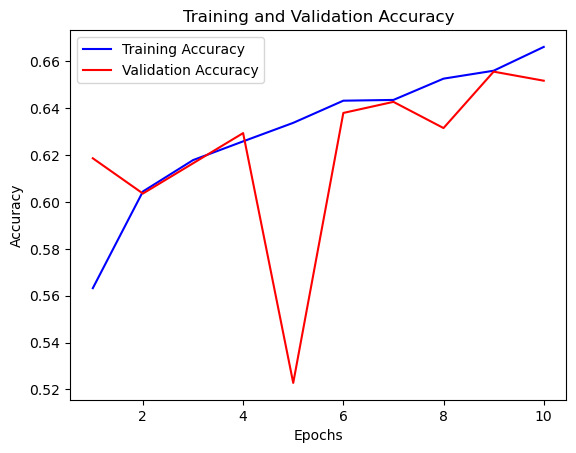

In [246]:
##---------Type the code below this line------------------##
train_accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']

# Plot the accuracy history
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

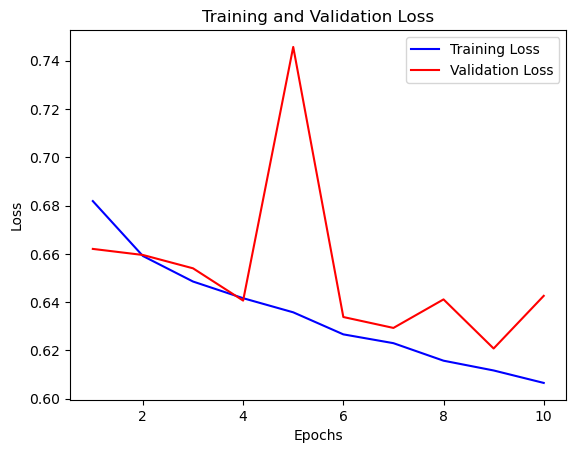

In [247]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Plot the loss history
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [248]:
test_loss, test_accuracy = model1.evaluate(test_ds)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

73/73 [==============================] - 11s 145ms/step - loss: 0.6526 - accuracy: 0.6298
Testing Loss: 0.652597963809967
Testing Accuracy: 0.6298366189002991


In [249]:
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
predictions = np.argmax(model.predict(test_ds), axis=-1)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(cm)

73/73 [==============================] - 10s 139ms/step
Confusion Matrix:
[[1120    0]
 [1206    0]]


In [250]:

# Generate classification report
report = classification_report(test_labels, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1120
           1       0.00      0.00      0.00      1206

    accuracy                           0.48      2326
   macro avg       0.24      0.50      0.33      2326
weighted avg       0.23      0.48      0.31      2326



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [251]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)


Epoch 1/3
582/582 [==============================] - 60s 101ms/step - loss: 0.6898 - accuracy: 0.5488 - val_loss: 0.6711 - val_accuracy: 0.6075
Epoch 2/3
582/582 [==============================] - 60s 101ms/step - loss: 0.6646 - accuracy: 0.5978 - val_loss: 0.6587 - val_accuracy: 0.6148
Epoch 3/3
582/582 [==============================] - 59s 99ms/step - loss: 0.6536 - accuracy: 0.6133 - val_loss: 0.6481 - val_accuracy: 0.6195


In [252]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)


Epoch 1/3
582/582 [==============================] - 149s 253ms/step - loss: 0.6795 - accuracy: 0.5649 - val_loss: 0.6619 - val_accuracy: 0.6208
Epoch 2/3
582/582 [==============================] - 146s 249ms/step - loss: 0.6603 - accuracy: 0.6038 - val_loss: 0.6493 - val_accuracy: 0.6174
Epoch 3/3
582/582 [==============================] - 153s 261ms/step - loss: 0.6499 - accuracy: 0.6171 - val_loss: 0.6465 - val_accuracy: 0.6165


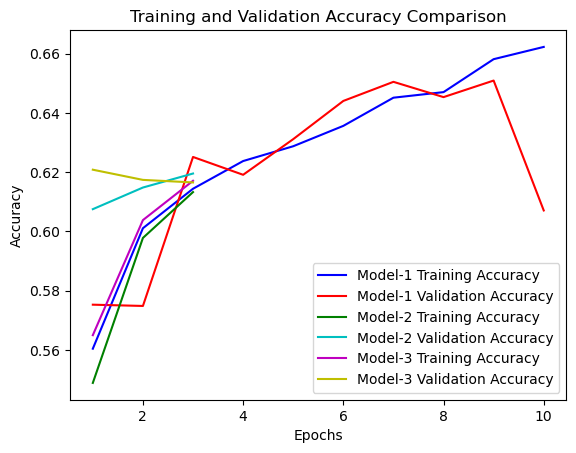

In [254]:
train_accuracy_1 = history.history['accuracy']
val_accuracy_1 = history.history['val_accuracy']

train_accuracy_2 = history_2.history['accuracy']
val_accuracy_2 = history_2.history['val_accuracy']

train_accuracy_3 = history_3.history['accuracy']
val_accuracy_3 = history_3.history['val_accuracy']


epochs_1 = range(1, len(train_accuracy_1) + 1)
epochs_2 = range(1, len(train_accuracy_2) + 1)
epochs_3 = range(1, len(train_accuracy_3) + 1)

# Plot the accuracy comparison
plt.plot(epochs_1, train_accuracy_1, 'b', label='Model-1 Training Accuracy')
plt.plot(epochs_1, val_accuracy_1, 'r', label='Model-1 Validation Accuracy')

plt.plot(epochs_2, train_accuracy_2[:len(epochs)], 'g', label='Model-2 Training Accuracy')
plt.plot(epochs_2, val_accuracy_2[:len(epochs)], 'c', label='Model-2 Validation Accuracy')

plt.plot(epochs_3, train_accuracy_3[:len(epochs)], 'm', label='Model-3 Training Accuracy')
plt.plot(epochs_3, val_accuracy_3[:len(epochs)], 'y', label='Model-3 Validation Accuracy')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



### 1. Dropout of ratio 0.25

In [271]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(124, 124, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])


### 2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 


In [279]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(124, 124, 3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-04)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [273]:
#Model compiling
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [278]:
#Model fit
history_7 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)



Epoch 1/3
582/582 [==============================] - 69s 116ms/step - loss: 0.6564 - accuracy: 0.6132 - val_loss: 0.7133 - val_accuracy: 0.5800
Epoch 2/3
582/582 [==============================] - 66s 111ms/step - loss: 0.6551 - accuracy: 0.6186 - val_loss: 0.6813 - val_accuracy: 0.5671
Epoch 3/3
582/582 [==============================] - 66s 112ms/step - loss: 0.6556 - accuracy: 0.6163 - val_loss: 0.6858 - val_accuracy: 0.5610


In [280]:
history_8 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)                  

Epoch 1/3
582/582 [==============================] - 65s 110ms/step - loss: 0.6531 - accuracy: 0.6197 - val_loss: 0.6723 - val_accuracy: 0.6002
Epoch 2/3
582/582 [==============================] - 67s 113ms/step - loss: 0.6515 - accuracy: 0.6215 - val_loss: 0.6710 - val_accuracy: 0.5911
Epoch 3/3
582/582 [==============================] - 66s 111ms/step - loss: 0.6512 - accuracy: 0.6239 - val_loss: 0.7090 - val_accuracy: 0.5830


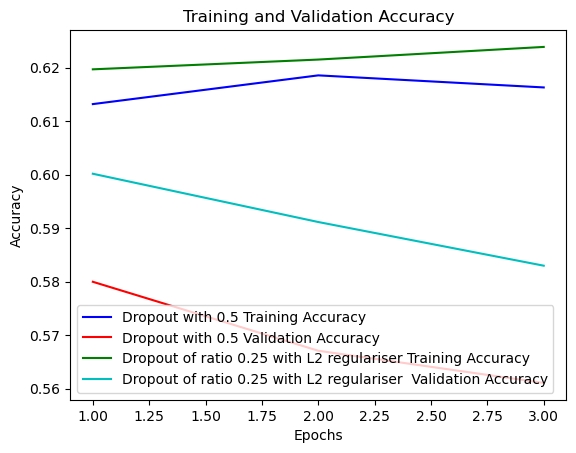

In [284]:
train_accuracy_7 = history_7.history['accuracy']
val_accuracy_7 = history_7.history['val_accuracy']

train_accuracy_8 = history_8.history['accuracy']
val_accuracy_8 = history_8.history['val_accuracy']

epochs_7 = range(1, len(train_accuracy_7) + 1)
epochs_8 = range(1, len(train_accuracy_8) + 1)

plt.plot(epochs_7, history_7.history['accuracy'], 'b', label='Dropout with 0.5 Training Accuracy')
plt.plot(epochs_7, history_7.history['val_accuracy'], 'r', label='Dropout with 0.5 Validation Accuracy')
plt.plot(epochs_8, history_8.history['accuracy'], 'g', label='Dropout of ratio 0.25 with L2 regulariser Training Accuracy')
plt.plot(epochs_8, history_8.history['val_accuracy'], 'c', label='Dropout of ratio 0.25 with L2 regulariser  Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


### Model compilation with SGD

In [255]:

history_4 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)

Epoch 1/3
582/582 [==============================] - 62s 105ms/step - loss: 0.6486 - accuracy: 0.6198 - val_loss: 0.6527 - val_accuracy: 0.6122
Epoch 2/3
582/582 [==============================] - 60s 102ms/step - loss: 0.6419 - accuracy: 0.6277 - val_loss: 0.6384 - val_accuracy: 0.6380
Epoch 3/3
582/582 [==============================] - 59s 99ms/step - loss: 0.6388 - accuracy: 0.6337 - val_loss: 0.6361 - val_accuracy: 0.6363


### Model compilation with RMSprop

In [269]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# Configure the training
model2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
# model.summary()
history_5 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)

Epoch 1/3
582/582 [==============================] - 73s 123ms/step - loss: 0.6659 - accuracy: 0.5977 - val_loss: 0.6745 - val_accuracy: 0.5920
Epoch 2/3
582/582 [==============================] - 70s 117ms/step - loss: 0.6652 - accuracy: 0.6007 - val_loss: 0.6749 - val_accuracy: 0.5787
Epoch 3/3
582/582 [==============================] - 66s 112ms/step - loss: 0.6635 - accuracy: 0.6015 - val_loss: 0.6726 - val_accuracy: 0.5860


### Model compilation with Adam

In [257]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
# Configure the training
model2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_6 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3 )
# model.summary()

Epoch 1/3
582/582 [==============================] - 77s 128ms/step - loss: 0.6746 - accuracy: 0.5767 - val_loss: 0.6723 - val_accuracy: 0.5911
Epoch 2/3
582/582 [==============================] - 73s 124ms/step - loss: 0.6705 - accuracy: 0.5900 - val_loss: 0.6717 - val_accuracy: 0.5800
Epoch 3/3
582/582 [==============================] - 73s 123ms/step - loss: 0.6668 - accuracy: 0.5946 - val_loss: 0.6751 - val_accuracy: 0.5843


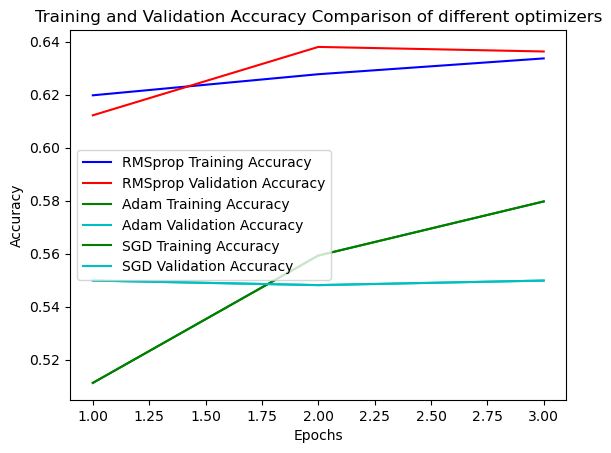

In [258]:
train_accuracy_4 = history_4.history['accuracy']
val_accuracy_4 = history_4.history['val_accuracy']

train_accuracy_5 = history_5.history['accuracy']
val_accuracy_5 = history_5.history['val_accuracy']

train_accuracy_6 = history_6.history['accuracy']
val_accuracy_6 = history_6.history['val_accuracy']

epochs_4 = range(1, len(train_accuracy_4) + 1)
epochs_5 = range(1, len(train_accuracy_5) + 1)
epochs_6 = range(1, len(train_accuracy_6) + 1)

# Plot the accuracy comparison
plt.plot(epochs_4, train_accuracy_4, 'b', label='RMSprop Training Accuracy')
plt.plot(epochs_4, val_accuracy_4, 'r', label='RMSprop Validation Accuracy')

plt.plot(epochs_5, train_accuracy_5, 'g', label='Adam Training Accuracy')
plt.plot(epochs_5, val_accuracy_5, 'c', label='Adam Validation Accuracy')

plt.plot(epochs_6, train_accuracy_5, 'g', label='SGD Training Accuracy')
plt.plot(epochs_6, val_accuracy_5, 'c', label='SGD Validation Accuracy')         

plt.title('Training and Validation Accuracy Comparison of different optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck